Відрізок 1:
S_0(x) = 2.45 + -4.4159(x - 0.4) + 0.0(x - 0.4)^2 + 7.8985(x - 0.4)^3, x належить [0.4, 0.6]
Відрізок 2:
S_1(x) = 1.63 + -3.4681(x - 0.6) + 4.7391(x - 0.6)^2 + -2.4474(x - 0.6)^3, x належить [0.6, 0.9]
Відрізок 3:
S_2(x) = 0.95 + -1.2855(x - 0.9) + 2.5364(x - 0.9)^2 + -1.6909(x - 0.9)^3, x належить [0.9, 1.4]
Відрізок 4:
S_3(x) = 0.73 + 0.0(x - 1.4) + 0.0(x - 1.4)^2 + 0.0(x - 1.4)^3, x належить [1.4, 2.0]
x = 0.40, y = 2.450
x = 0.42, y = 2.370
x = 0.43, y = 2.292
x = 0.45, y = 2.217
x = 0.46, y = 2.145
x = 0.48, y = 2.075
x = 0.50, y = 2.007
x = 0.51, y = 1.942
x = 0.53, y = 1.879
x = 0.55, y = 1.819
x = 0.56, y = 1.760
x = 0.58, y = 1.704
x = 0.59, y = 1.650
x = 0.61, y = 1.598
x = 0.63, y = 1.547
x = 0.64, y = 1.499
x = 0.66, y = 1.453
x = 0.67, y = 1.408
x = 0.69, y = 1.366
x = 0.71, y = 1.325
x = 0.72, y = 1.285
x = 0.74, y = 1.248
x = 0.76, y = 1.212
x = 0.77, y = 1.177
x = 0.79, y = 1.144
x = 0.80, y = 1.112
x = 0.82, y = 1.082
x = 0.84, y = 1.053
x = 0.85, y = 1.025

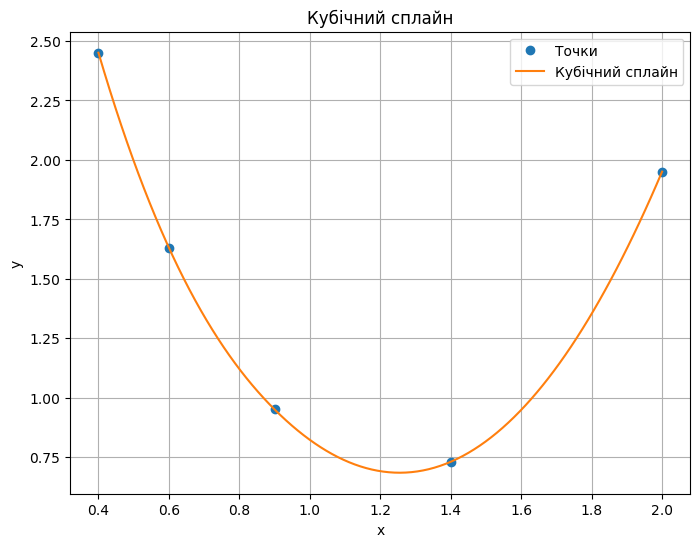

In [20]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

x = np.array([0.4, 0.6, 0.9, 1.4, 2])
y = np.array([2.45, 1.63, 0.95, 0.73, 1.95])
n = len(x) - 1

h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n)
alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n)
mu = np.zeros(n)
z = np.zeros(n)
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]
for j in range(n - 2, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

cs = CubicSpline(x, y)

x_new = np.linspace(np.min(x), np.max(x), 100)
y_new = cs(x_new)

for i in range(len(x_new)):
    print(f"x = {x_new[i]:.2f}, y = {y_new[i]:.3f}")

plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Точки')
plt.plot(x_new, y_new, label='Кубічний сплайн')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.legend()
plt.grid(True)
plt.show()


## Next steps 🏃

This is just a short introduction to JupyterLab and Jupyter Notebooks. See below for some more ways to interact with tools in the Jupyter ecosystem, and its community.

### Other notebooks in this demo

Here are some other notebooks in this demo. Each of the items below corresponds to a file or folder in the **file browser to the left**.

- [**`Lorenz.ipynb`**](Lorenz.ipynb) uses Python to demonstrate interactive visualizations and computations around the [Lorenz system](https://en.wikipedia.org/wiki/Lorenz_system). It shows off basic Python functionality, including more visualizations, data structures, and scientific computing libraries.
- [**`sqlite.ipynb`**](sqlite.ipynb) demonstrates how an in-browser sqlite kernel to run your own SQL commands from the notebook. It uses the [jupyterlite/xeus-sqlite-kernel](https://github.com/jupyterlite/xeus-sqlite-kernel).

### Other sources of information in Jupyter

- **More on using JupyterLab**: See [the JupyterLab documentation](https://jupyterlab.readthedocs.io/en/stable/) for more thorough information about how to install and use JupyterLab.
- **More interactive demos**: See [try.jupyter.org](https://try.jupyter.org) for more interactive demos with the Jupyter ecosystem.
- **Learn more about Jupyter**: See [the Jupyter community documentation](https://docs.jupyter.org) to learn more about the project, its community and tools, and how to get involved.
- **Join our discussions**: The [Jupyter Community Forum](https://discourse.jupyter.org) is a place where many in the Jupyter community ask questions, help one another, and discuss issues around interactive computing and our ecosystem.